In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
movies = pd.read_csv( './data/douban/movies.csv')
print('电影数目（有名称）：%d' % movies[~pd.isnull(movies.title)].shape[0])
print('电影数目（没有名称）：%d' % movies[pd.isnull(movies.title)].shape[0])
print('电影数目（总计）：%d' % movies.shape[0])
movies.sample(10)

电影数目（有名称）：33258
电影数目（没有名称）：24166
电影数目（总计）：57424


,movieId,title
14485,14485,Alaska
5142,5142,The Elephant Man
16664,16664,Roman Polanski Short Films
29025,29025,Silent Running
29348,29348,The Crush
14616,14616,NaN
42469,42469,Yo soy la Juani
319,319,Hitch
5986,5986,Afro Samurai
1280,1280,The Butterfly Effect 2


In [5]:
ratings = pd.read_csv('./data/douban/ratings.csv')
print('用户数据：%d' % ratings.userId.unique().shape[0])
print('电影数据：%d' % ratings.movieId.unique().shape[0])
print('评分数目：%d' % ratings.shape[0])
ratings.head()

用户数据：28718
电影数据：57424
评分数目：2828500


,userId,movieId,rating,timestamp
0,0,0,5,1318222486
1,0,1,4,1313813583
2,0,2,5,1313458035
3,0,3,5,1313327802
4,0,4,3,1312126734


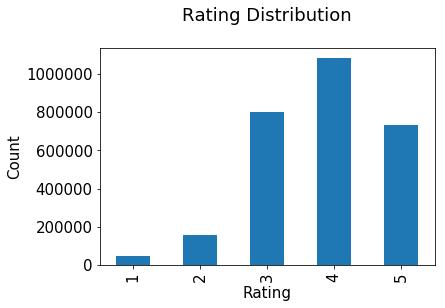

In [6]:
plt.rc("font", size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [7]:
rating_count = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
movieId,
150,6574
415,6003
414,5994
19,5274
93,5072


In [8]:
most_rated_movies = pd.DataFrame([150, 415, 414, 19, 93], index=np.arange(5), columns = ['movieId'])
most_rated_movies_summary = pd.merge(most_rated_movies, movies, on='movieId')
most_rated_movies_summary

,movieId,title
0,150,The Shawshank Redemption
1,415,Léon
2,414,Forrest Gump
3,19,Inception
4,93,Le fabuleux destin d\'Amélie Poulain


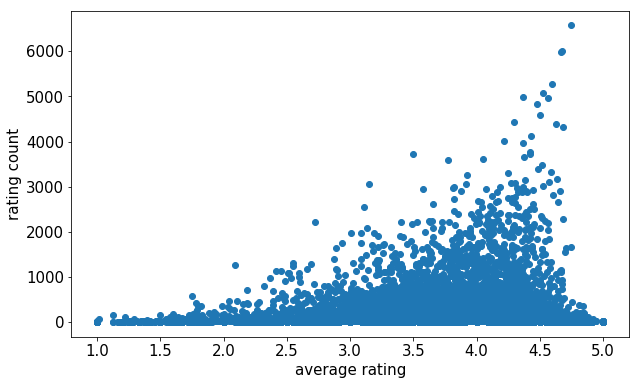

In [10]:
average_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

plt.figure(figsize=(10,6))
plt.scatter(average_rating.rating,average_rating.ratingCount)
plt.xlabel('average rating')
plt.ylabel('rating count')
plt.show()

In [11]:

user_rating_count = ratings['userId'].value_counts()
ratings = ratings[ratings['userId'].isin(user_rating_count[user_rating_count >= 10].index)]
 
movied_rating_counts = ratings['movieId'].value_counts()
ratings = ratings[ratings['movieId'].isin(movied_rating_counts[movied_rating_counts >= 10].index)]


In [14]:
ratings_pivot = ratings.pivot(index='userId', columns='movieId',values='rating').fillna(0)
userID = ratings_pivot.index
movieId = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head(10)

(18378, 19454)


movieId,0,1,2,3,4,5,6,8,9,10,...,45851,46047,46054,46128,46213,46618,47135,47650,47709,57167
userId,,,,,,,,,,,,,,,,,,,,,
0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,5.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
example_movieId=2550
bones_ratings = ratings_pivot[example_movieId]
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
 
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
pearson_corr=corr_summary[corr_summary['ratingCount']>=500].sort_values('pearsonR', ascending=False).head(11)
print(movies[movies.movieId == example_movieId]['title'].values[0])
print(pearson_corr)

黃飛鴻之三獅王爭霸
         pearsonR  ratingCount
movieId                       
2550     1.000000          768
2552     0.768851          655
3143     0.711899          680
639      0.683292          863
3874     0.640553          719
3732     0.639176          541
1815     0.601323          622
2553     0.582900          532
2547     0.570718          581
3072     0.528288          507
2956     0.524879          579


In [16]:
print(movies[movies.movieId == example_movieId]['title'].values[0])
corr_movie_ids=pearson_corr.index
movie_corr = pd.DataFrame(corr_movie_ids[1:], index=np.arange(10), columns=['movieId'])
corr_movies = pd.merge(movie_corr, movies, on='movieId')
corr_movies

黃飛鴻之三獅王爭霸


,movieId,title
0,2552,黃飛鴻之二男兒當自強
1,3143,黃飛鴻
2,639,方世玉
3,3874,太极张三丰
4,3732,方世玉续集
5,1815,精武英雄
6,2553,新少林五祖
7,2547,倚天屠龍記之魔教教主
8,3072,中南海保镖
9,2956,红番区
